In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df= pd.read_csv(r"C:\Users\lakshmilokeswari\Downloads\scores_data.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


### Dataset Description

- **Batch**: Name of the batch
- **User_ID**: Unique identifier for each student
- **Score**: Test score (0 to 7)


In [33]:
df.describe()


,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [34]:
df.isnull().sum()


Batch          0
User_ID        0
   Score       0
dtype: int64

# No missing values detected  
# Scores fall within the expected range (0–7)


In [35]:
print(df.columns)


Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [37]:
df["Batch "].value_counts()


Batch 
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

# Each batch contains a comparable number of students, allowing fair performance comparison.


In [38]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [39]:
df["Score"].dtype


dtype('O')

In [40]:
df["Score"].head(10)


0    6 / 7
1    6 / 7
2    7 / 7
3    7 / 7
4    4 / 7
5    7 / 7
6    5 / 7
7    7 / 7
8    3 / 7
9    6 / 7
Name: Score, dtype: object

In [41]:
df["Score"] = (
    df["Score"]
    .str.split("/")
    .str[0]
    .astype(float)
)


In [42]:
df.dtypes
df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6.0
1,AI_ELITE_7,uid_148,6.0
2,AI_ELITE_7,uid_147,7.0
3,AI_ELITE_7,uid_146,7.0
4,AI_ELITE_7,uid_145,4.0


In [43]:
df.dtypes


Batch       object
User_ID     object
Score      float64
dtype: object

In [45]:
batch_stats = df.groupby("Batch")["Score"].agg(
    count="count",
    mean="mean",
    median="median",
    min="min",
    max="max",
    std="std"
)

batch_stats


,count,mean,median,min,max,std
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,0.0,7.0,1.443376
AI_ELITE_6,48,4.229167,4.0,0.0,7.0,1.640441
AI_ELITE_7,53,5.056604,5.0,2.0,7.0,1.446682


- **Mean** represents average performance
- **Median** shows central tendency
- **Standard** deviation indicates consistency


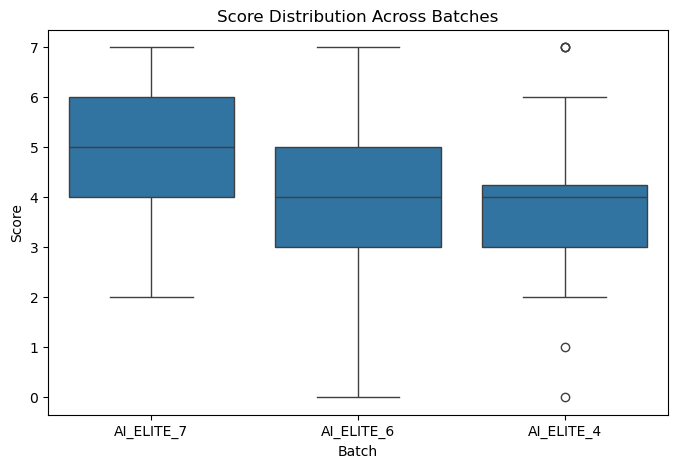

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Batch", y="Score", data=df)
plt.title("Score Distribution Across Batches")
plt.show()


- **AI_ELITE_7** shows higher median and tighter spread
- **AI_ELITE_4** has lower scores with higher variability


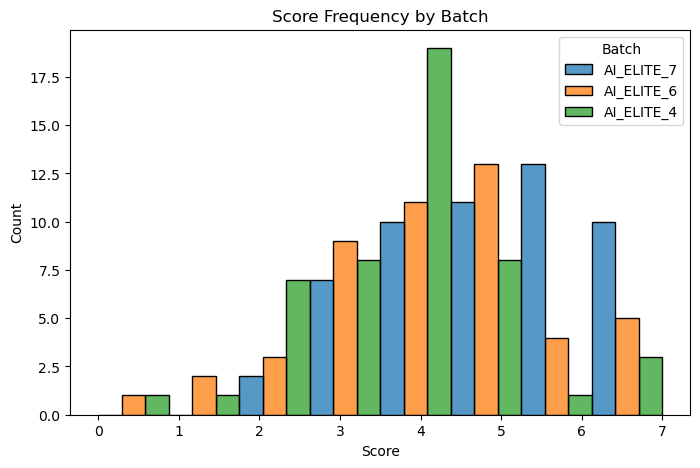

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Score", hue="Batch", multiple="dodge", bins=8)
plt.title("Score Frequency by Batch")
plt.show()


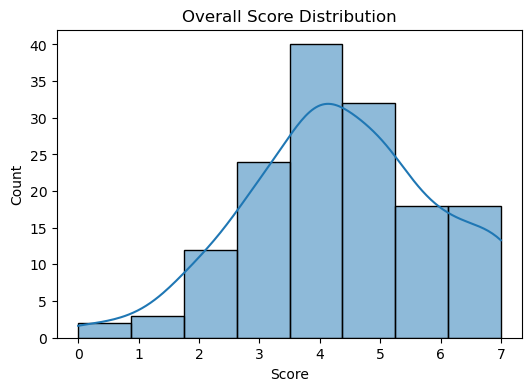

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(df["Score"], bins=8, kde=True)
plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

**Higher score concentration (5–7) is observed in AI_ELITE_7**.


**Lower score concentration (0–3) is prominent in AI_ELITE_4**.


In [50]:
def performance_label(score):
    if score <= 2:
        return "Low"
    elif score <= 4:
        return "Medium"
    else:
        return "High"

df["Performance_Level"] = df["Score"].apply(performance_label)
df.head()


,Batch,User_ID,Score,Performance_Level
0,AI_ELITE_7,uid_149,6.0,High
1,AI_ELITE_7,uid_148,6.0,High
2,AI_ELITE_7,uid_147,7.0,High
3,AI_ELITE_7,uid_146,7.0,High
4,AI_ELITE_7,uid_145,4.0,Medium


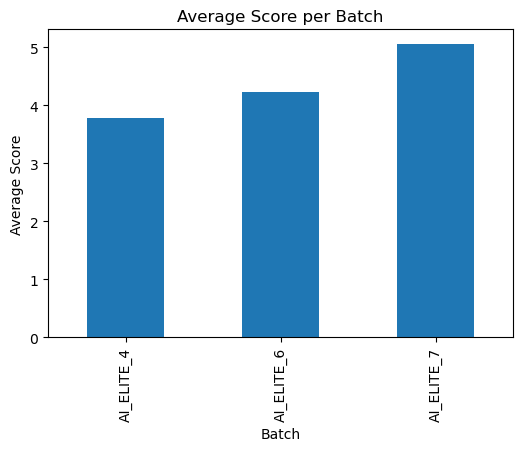

In [54]:
batch_stats["mean"].plot(kind="bar", figsize=(6,4))
plt.title("Average Score per Batch")
plt.ylabel("Average Score")
plt.show()

In [55]:
df[df["Score"] >= 5].groupby("Batch")["User_ID"].count()

Batch
AI_ELITE_4    12
AI_ELITE_6    22
AI_ELITE_7    34
Name: User_ID, dtype: int64

In [51]:
pd.crosstab(df["Batch"], df["Performance_Level"], normalize="index") * 100


Performance_Level,High,Low,Medium
Batch,,,
AI_ELITE_4,25.000000,18.750000,56.250000
AI_ELITE_6,45.833333,12.500000,41.666667
AI_ELITE_7,64.150943,3.773585,32.075472


- **AI_ELITE_7 has the highest percentage of High performers**
- **AI_ELITE_4 has a larger Low-performing segment**
- **AI_ELITE_6 shows balanced distribution**


In [53]:
top_performers = df[df["Score"] == 7]
bottom_performers = df[df["Score"] == 0]

top_performers.head(), bottom_performers.head()


(         Batch  User_ID  Score Performance_Level
 2   AI_ELITE_7  uid_147    7.0              High
 3   AI_ELITE_7  uid_146    7.0              High
 5   AI_ELITE_7  uid_144    7.0              High
 7   AI_ELITE_7  uid_142    7.0              High
 15  AI_ELITE_7  uid_134    7.0              High,
           Batch User_ID  Score Performance_Level
 68   AI_ELITE_6  uid_81    0.0               Low
 135  AI_ELITE_4  uid_14    0.0               Low)

## Key Insights

1. AI_ELITE_7 is the strongest and most consistent batch.
2. AI_ELITE_6 demonstrates moderate performance with variability.
3. AI_ELITE_4 requires additional academic support and intervention.
4. Higher consistency correlates with better average performance.


# Recommendations

- Provide remedial sessions for AI_ELITE_4
- Offer personalized mentoring for AI_ELITE_6
- Introduce advanced challenges for AI_ELITE_7
- Use peer-learning by pairing high performers with low performers
